In [89]:
import cv2 
import numpy as np 
from tqdm import tqdm

import matplotlib.pyplot as plt 

In [24]:
image = cv2.imread("temple.jpeg")
image = image[:,:,::-1]

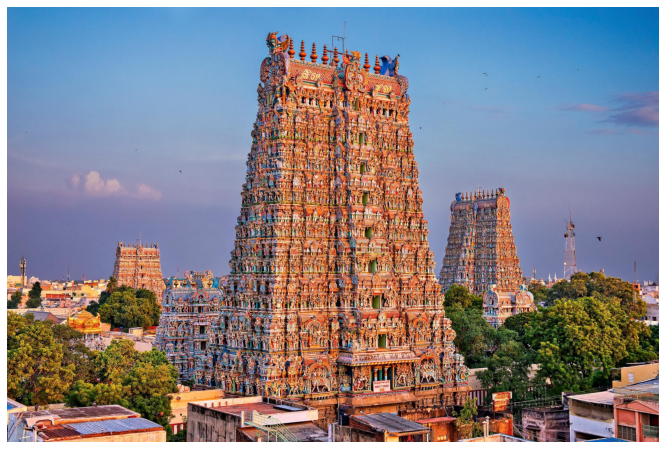

In [26]:
plt.figure(figsize = (12,8))
plt.axis('off')
plt.imshow(image)

### Adding Gaussian Noise

In [63]:
gauss = np.random.normal(0,2,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(image,gauss)

(-0.5, 3071.5, 2049.5, -0.5)

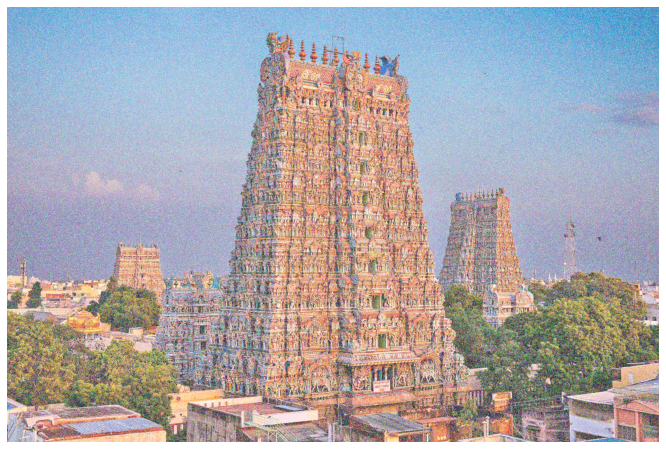

In [67]:
plt.figure(figsize = (12,8))
plt.imshow(img_gauss)
plt.axis('off')

In [92]:
def perform_image_operation(image, n):
    final_image = np.zeros(image.shape, dtype = np.float64)
    for _ in tqdm(range(n)):
        gauss = np.random.normal(0,2,image.size)
        gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
        # Add the Gaussian noise to the image
        gauss_image = np.add(image,gauss)
        final_image = final_image + gauss_image
#         plt.imshow(final_image)
#         print(np.max(final_image))
#         plt.show()
    final_image = (final_image / n).astype('uint8')
    return final_image

In [95]:
output3 = perform_image_operation(img_gauss, 25)

100%|███████████████████████████████████████████| 25/25 [00:14<00:00,  1.74it/s]


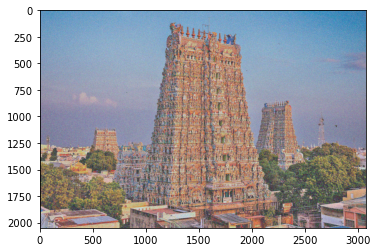

In [96]:
plt.imshow(output)

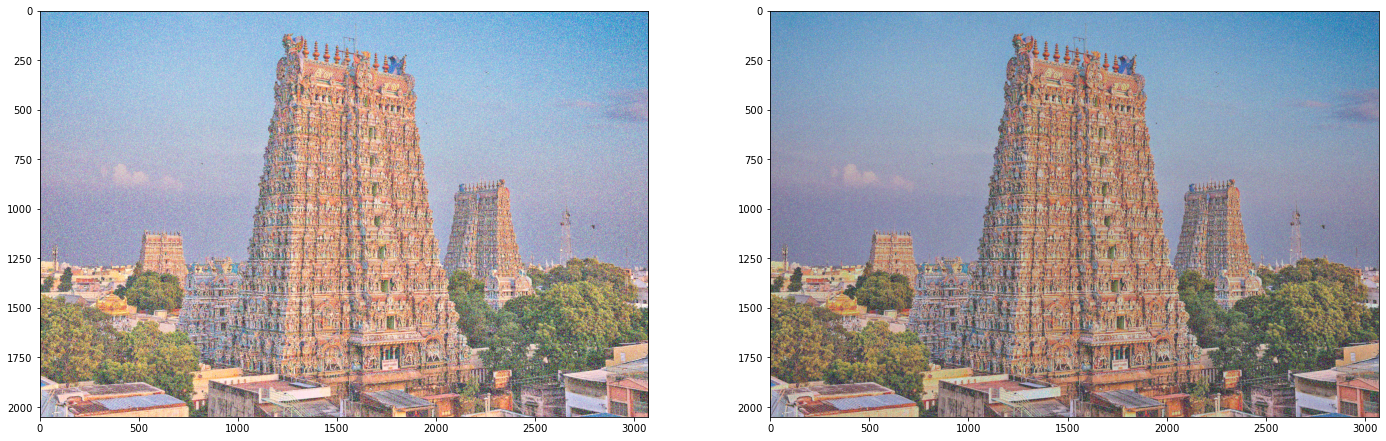

In [97]:
plt.figure(figsize = (24,8))

plt.subplot(121)
plt.imshow(img_gauss)

plt.subplot(122)
plt.imshow(output)

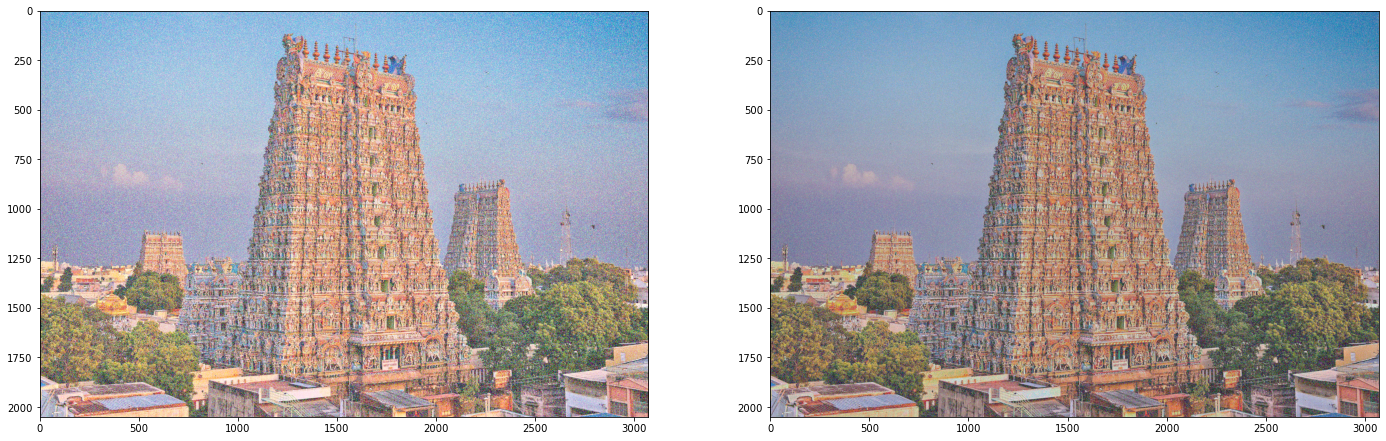

In [98]:
plt.figure(figsize = (24,8))

plt.subplot(121)
plt.imshow(img_gauss)

plt.subplot(122)
plt.imshow(output2)

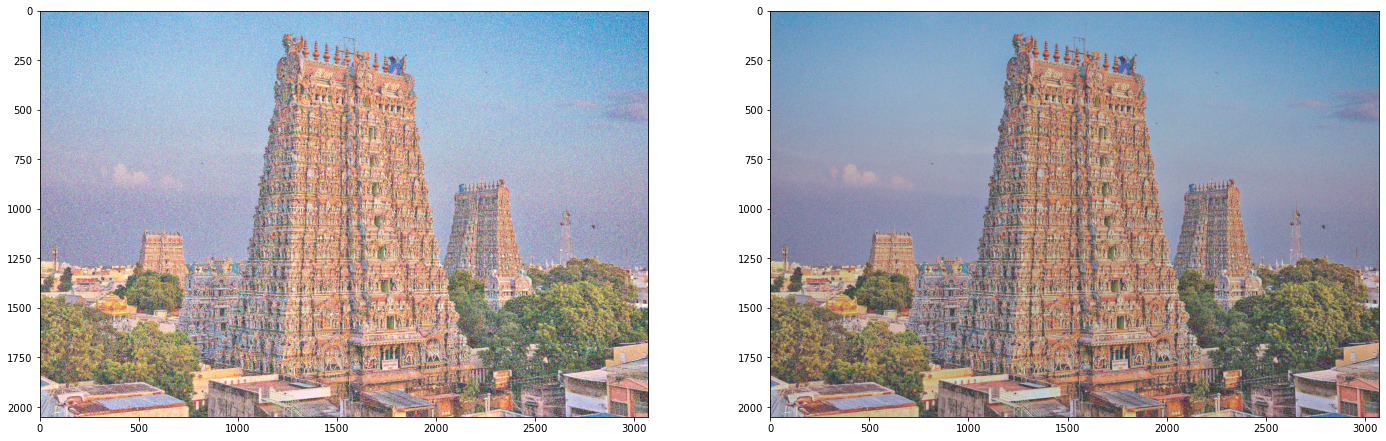

In [100]:
plt.figure(figsize = (24,8))

plt.subplot(121)
plt.imshow(img_gauss)

plt.subplot(122)
plt.imshow(output3)

Not visible difference here, that's also because plt reduces the size a lot before displaying, To have a better guess what's going on, let's save the image and view them there

In [101]:
cv2.imwrite("original.png",img_gauss)
cv2.imwrite("averaged.png", output3)

True